In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from tqdm.notebook import *

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df=pd.read_csv("Donnees_propres.csv")
display(df.head())
display(df.info())

,lib_mrq,lib_mod_doss,lib_mod,dscom,hybride,puiss_admin_98,puiss_max,conso_urb,conso_exurb,conso_mixte,...,ptcl,masse_ordma_min,masse_ordma_max,champ_v9,Carrosserie,gamme,carburant,typ_boite,nb_rapp,etiquette
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),non,12,147.0,11.3,5.8,7.8,...,0.002,1505,1505,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Essence,Manuelle,6,E
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),non,12,147.0,11.5,6.0,8.0,...,0.002,1555,1555,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Essence,Manuelle,6,E
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),non,7,100.0,6.6,4.2,5.1,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),non,7,100.0,6.6,4.2,5.1,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),non,9,125.0,6.9,4.3,5.3,...,0.001,1565,1565,715/2007*692/2008EURO5,BERLINE,MOY-SUPER,Gazoil,Manuelle,6,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52308 entries, 0 to 52307
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lib_mrq          52308 non-null  object 
 1   lib_mod_doss     52308 non-null  object 
 2   lib_mod          52308 non-null  object 
 3   dscom            52308 non-null  object 
 4   hybride          52308 non-null  object 
 5   puiss_admin_98   52308 non-null  int64  
 6   puiss_max        52308 non-null  float64
 7   conso_urb        52308 non-null  float64
 8   conso_exurb      52308 non-null  float64
 9   conso_mixte      52308 non-null  float64
 10  co2              52308 non-null  float64
 11  co_typ_1         52308 non-null  float64
 12  nox              52308 non-null  float64
 13  ptcl             52308 non-null  float64
 14  masse_ordma_min  52308 non-null  int64  
 15  masse_ordma_max  52308 non-null  int64  
 16  champ_v9         52308 non-null  object 
 17  Carrosserie 

None

On supprime les colonnes qui contiennent des informations sur la marque ou le constructeur :
lib_mrq, lib_mod_doss, lib_mod_ dscom ainsi que la variable champ_v9, co2 (nous avons les etiquettes), puiss_admin_98, co_typ_1 


In [4]:
to_drop = ['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'champ_v9', 'co2', 'puiss_admin_98', 'co_typ_1',
           'conso_urb', 'conso_exurb', 'conso_mixte']
df_clear = df.drop(to_drop, axis = 1)

In [78]:

# On récupère les colonnes de type Object
colonnes_object = df_clear.select_dtypes(include='object')

# On calcule le nombre de modalités de chacune de ces variables
categories_uniques = colonnes_object.nunique()
print(categories_uniques)

# 6 Variables catégorielles à réencoder

hybride         2
Carrosserie    11
gamme           6
carburant       4
typ_boite       3
etiquette       7
dtype: int64


Reencodage des variables categorielles

In [5]:
# Variable hybride

df_clear['hybride'] = df_clear['hybride'].replace({'oui':1, 'non': 0})
display('hybride', df_clear['hybride'].unique())

# Variable cible etiquette
# On créé un dictionnaire qui contient les changements souhaités
grade = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

# On remplace les notes alphabétiques par les notes numériques correspondantes
df_clear['etiquette'] = df_clear['etiquette'].replace(grade)
display('etiquette', df_clear['etiquette'].unique())

df_encoded = pd.get_dummies(df_clear, dtype='int')


'hybride'

array([0, 1])

'etiquette'

array([4, 2, 3, 1, 0, 5, 6])

In [80]:
df_encoded.info()
df_encoded.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52308 entries, 0 to 52307
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   hybride                          52308 non-null  int64  
 1   puiss_max                        52308 non-null  float64
 2   nox                              52308 non-null  float64
 3   ptcl                             52308 non-null  float64
 4   masse_ordma_min                  52308 non-null  int64  
 5   masse_ordma_max                  52308 non-null  int64  
 6   nb_rapp                          52308 non-null  int64  
 7   etiquette                        52308 non-null  int64  
 8   Carrosserie_BERLINE              52308 non-null  int64  
 9   Carrosserie_BREAK                52308 non-null  int64  
 10  Carrosserie_CABRIOLET            52308 non-null  int64  
 11  Carrosserie_COMBISPACE           52308 non-null  int64  
 12  Carrosserie_COMBIS

Index(['hybride', 'puiss_max', 'nox', 'ptcl', 'masse_ordma_min',
       'masse_ordma_max', 'nb_rapp', 'etiquette', 'Carrosserie_BERLINE',
       'Carrosserie_BREAK', 'Carrosserie_CABRIOLET', 'Carrosserie_COMBISPACE',
       'Carrosserie_COMBISPCACE', 'Carrosserie_COUPE', 'Carrosserie_MINIBUS',
       'Carrosserie_MINISPACE', 'Carrosserie_MONOSPACE',
       'Carrosserie_MONOSPACE COMPACT', 'Carrosserie_TS TERRAINS/CHEMINS',
       'gamme_ECONOMIQUE', 'gamme_INFERIEURE', 'gamme_LUXE', 'gamme_MOY-INFER',
       'gamme_MOY-SUPER', 'gamme_SUPERIEURE', 'carburant_Essence',
       'carburant_Essence/Elec', 'carburant_Gasoil/Elec', 'carburant_Gazoil',
       'typ_boite_Auto', 'typ_boite_Manuelle', 'typ_boite_Var_continue'],
      dtype='object')

Separation des données

In [6]:


X = df_encoded.drop(columns ='etiquette', axis = 1)
y= df_encoded['etiquette']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)



Standardisation des données

In [7]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

# Premiers modèles

Random Forest

score données train 0.8939922573244754
score données test 0.8729688396100173
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        31
           1       0.83      0.88      0.86       249
           2       0.87      0.80      0.83       427
           3       0.79      0.77      0.78       324
           4       0.80      0.87      0.83      3333
           5       0.92      0.88      0.90      5968
           6       1.00      0.93      0.96       130

    accuracy                           0.87     10462
   macro avg       0.87      0.85      0.86     10462
weighted avg       0.88      0.87      0.87     10462



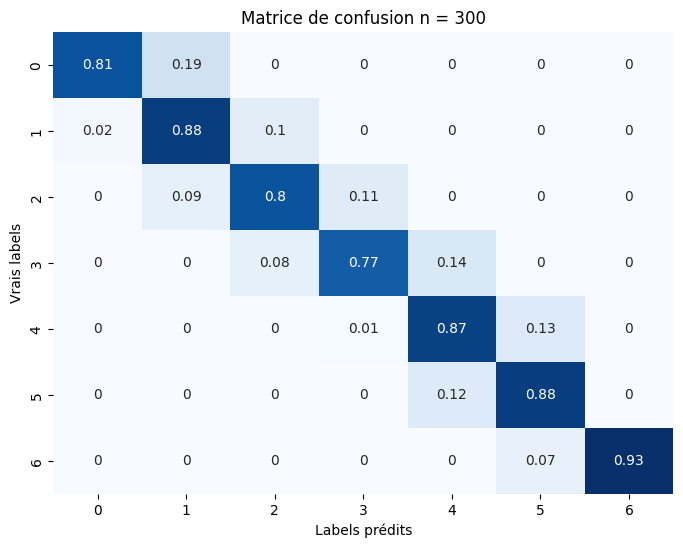

In [83]:

# Modele
model1 = RandomForestClassifier(n_estimators=300, random_state=42)
model1.fit(X_train_scaled, y_train)

# Prediction
y_pred = model1.predict(X_test_scaled)


# Résultats
print('score données train', model1.score(X_train_scaled, y_train))
print('score données test', model1.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion n = 300")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# Certaines classes sont sous représentées

score données train 0.8928690914304832
score données test 0.8761231122156375
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        31
           1       0.84      0.90      0.87       249
           2       0.86      0.81      0.84       427
           3       0.79      0.78      0.79       324
           4       0.79      0.89      0.84      3333
           5       0.94      0.87      0.91      5968
           6       0.99      0.93      0.96       130

    accuracy                           0.88     10462
   macro avg       0.87      0.86      0.86     10462
weighted avg       0.88      0.88      0.88     10462



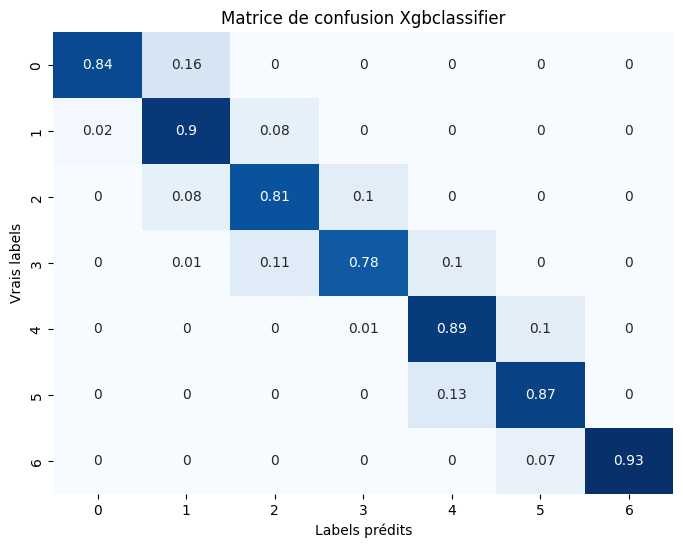

In [115]:
from xgboost import XGBClassifier

model2 = XGBClassifier(eval_metric="merror", use_label_encoder=False)

model2.fit(X_train_scaled, y_train)

# Prediction
y_pred = model2.predict(X_test_scaled)

# Résultats
print('score données train', model2.score(X_train_scaled, y_train))
print('score données test', model2.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion Xgbclassifier")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

RandomForest avec l'argument Weight Balanced

score données train 0.8847440615590498
score données test 0.8698145670043969
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        31
           1       0.82      0.87      0.84       249
           2       0.87      0.79      0.83       427
           3       0.70      0.87      0.78       324
           4       0.78      0.91      0.84      3333
           5       0.96      0.85      0.90      5968
           6       0.75      0.99      0.85       130

    accuracy                           0.87     10462
   macro avg       0.80      0.87      0.83     10462
weighted avg       0.88      0.87      0.87     10462



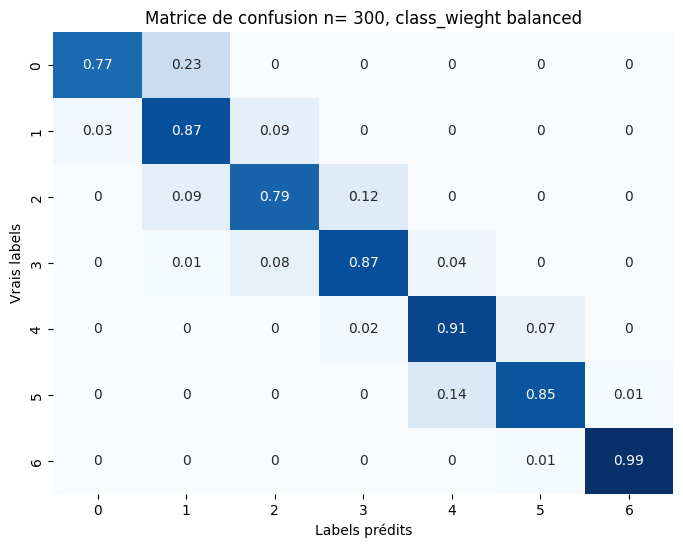

In [84]:
# Modele avec l'argument class_weight='balanced'
model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion n= 300, class_wieght balanced")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

RandomForest avec 500 branches

score données train 0.8939922573244754
score données test 0.872108583444848
              precision    recall  f1-score   support

           0       0.89      0.77      0.83        31
           1       0.83      0.86      0.85       249
           2       0.85      0.81      0.83       427
           3       0.79      0.77      0.78       324
           4       0.80      0.86      0.83      3333
           5       0.92      0.89      0.90      5968
           6       1.00      0.93      0.96       130

    accuracy                           0.87     10462
   macro avg       0.87      0.84      0.85     10462
weighted avg       0.87      0.87      0.87     10462



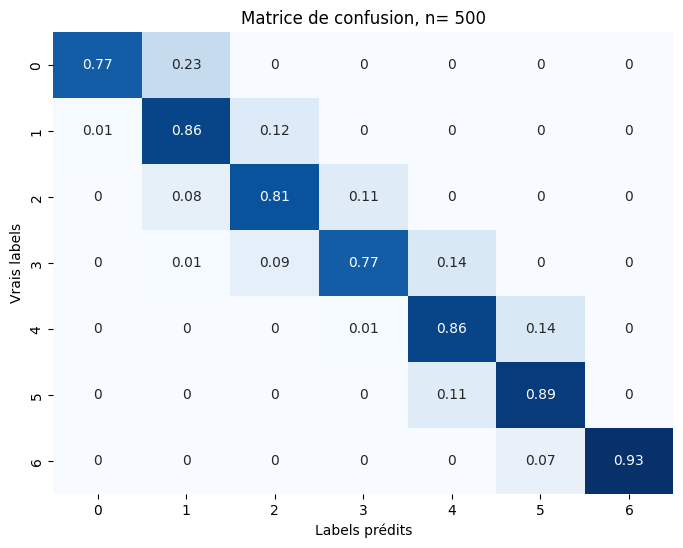

In [85]:
model = RandomForestClassifier(n_estimators=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)


# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion, n= 500")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

RandomForest avec réechantillonage SMOTE

score données train 0.9501059560312067
score données test 0.8694322309309883
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        31
           1       0.81      0.87      0.84       249
           2       0.87      0.77      0.82       427
           3       0.71      0.86      0.78       324
           4       0.78      0.91      0.84      3333
           5       0.95      0.85      0.90      5968
           6       0.78      0.96      0.86       130

    accuracy                           0.87     10462
   macro avg       0.80      0.86      0.83     10462
weighted avg       0.88      0.87      0.87     10462



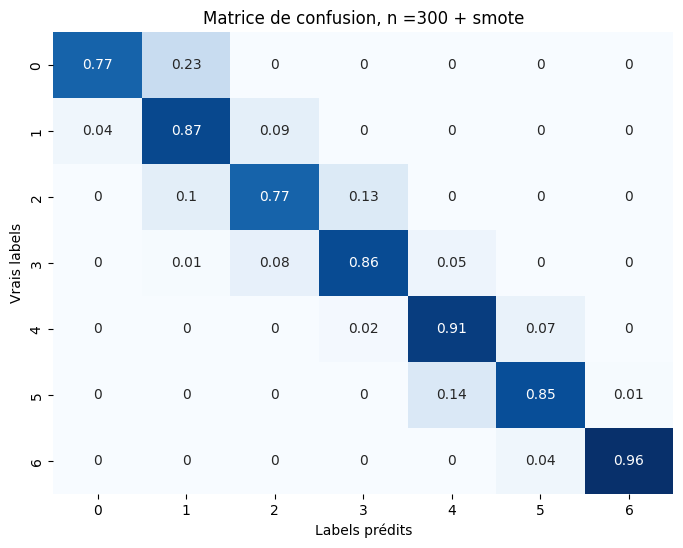

In [86]:


smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_smote, y_train_smote)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_smote, y_train_smote))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion, n =300 + smote")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

XGBoost

score données train 0.9418307308006487
score données test 0.8686675587841712
              precision    recall  f1-score   support

           0       0.66      0.74      0.70        31
           1       0.79      0.87      0.83       249
           2       0.87      0.77      0.82       427
           3       0.70      0.86      0.77       324
           4       0.78      0.91      0.84      3333
           5       0.96      0.85      0.90      5968
           6       0.74      1.00      0.85       130

    accuracy                           0.87     10462
   macro avg       0.79      0.86      0.81     10462
weighted avg       0.88      0.87      0.87     10462



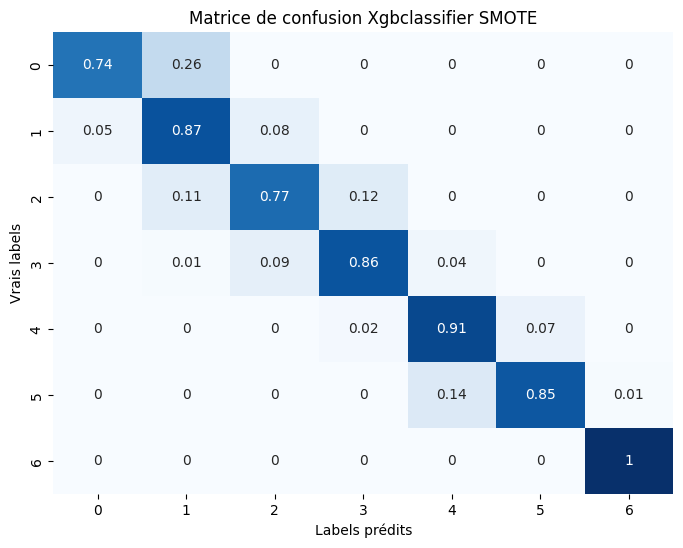

In [113]:

model = XGBClassifier(eval_metric="merror", use_label_encoder=False)

model.fit(X_train_smote, y_train_smote)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_smote, y_train_smote))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion Xgbclassifier SMOTE")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

RandomForest avec undersampling

score données train 0.9655419956927495
score données test 0.8129420760848786
              precision    recall  f1-score   support

           0       0.47      1.00      0.64        31
           1       0.69      0.74      0.72       249
           2       0.81      0.65      0.72       427
           3       0.52      0.87      0.65       324
           4       0.76      0.79      0.78      3333
           5       0.91      0.83      0.87      5968
           6       0.42      0.99      0.59       130

    accuracy                           0.81     10462
   macro avg       0.65      0.84      0.71     10462
weighted avg       0.83      0.81      0.82     10462



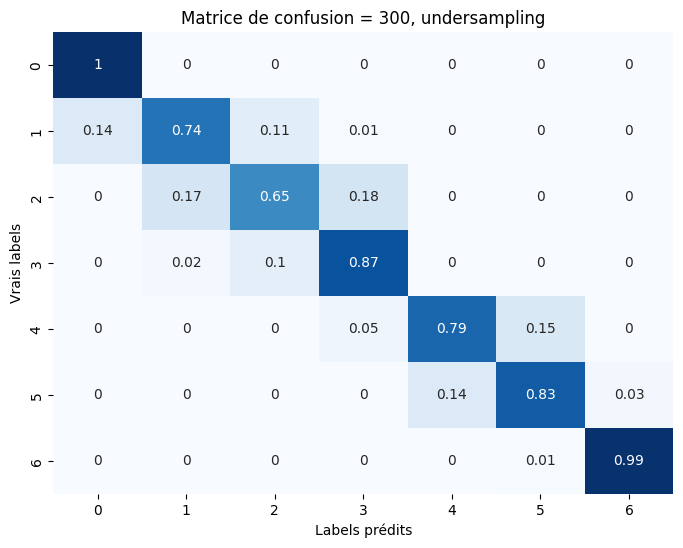

In [87]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)


model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Prediction
y_pred = model.predict(X_test_scaled)


# Résultats
print('score données train', model.score(X_train_resampled, y_train_resampled))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion = 300, undersampling")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# Moins précis que le modele avec les données non rééchantillonées

score données train 0.9655419956927495
score données test 0.8134199961766393
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        31
           1       0.71      0.75      0.73       249
           2       0.78      0.65      0.71       427
           3       0.57      0.87      0.68       324
           4       0.76      0.78      0.77      3333
           5       0.90      0.84      0.87      5968
           6       0.42      0.99      0.59       130

    accuracy                           0.81     10462
   macro avg       0.66      0.84      0.72     10462
weighted avg       0.83      0.81      0.82     10462



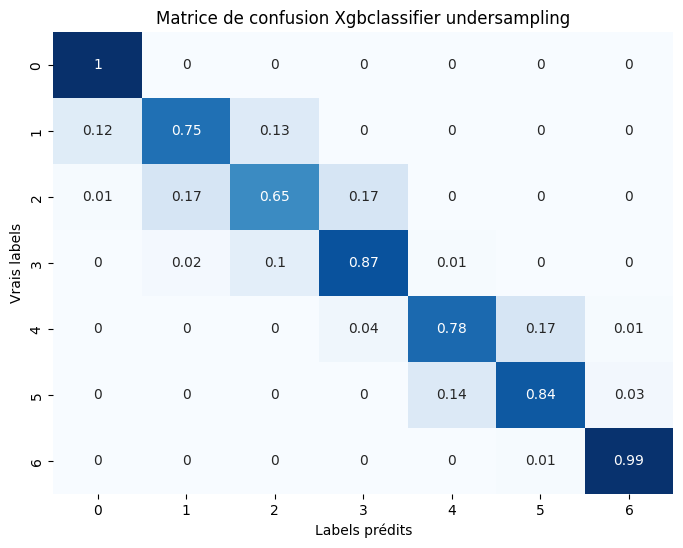

In [114]:
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric="merror", use_label_encoder=False)

model.fit(X_train_resampled, y_train_resampled)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_resampled, y_train_resampled))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion Xgbclassifier undersampling")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

# Selecion de variables

On teste le premier modèle avec les variables qui ont le plus d'importance

                            Feature  Importance
2                               nox    0.243543
5                   masse_ordma_max    0.146017
4                   masse_ordma_min    0.116566
6                           nb_rapp    0.084116
1                         puiss_max    0.078076
29               typ_boite_Manuelle    0.070816
28                   typ_boite_Auto    0.068786
13              Carrosserie_MINIBUS    0.037828
3                              ptcl    0.037507
21                  gamme_MOY-INFER    0.020982
22                  gamme_MOY-SUPER    0.019607
7               Carrosserie_BERLINE    0.017423
27                 carburant_Gazoil    0.010351
24                carburant_Essence    0.009667
20                       gamme_LUXE    0.009000
23                 gamme_SUPERIEURE    0.006512
17  Carrosserie_TS TERRAINS/CHEMINS    0.005283
8                 Carrosserie_BREAK    0.003996
19                 gamme_INFERIEURE    0.002635
9             Carrosserie_CABRIOLET    0

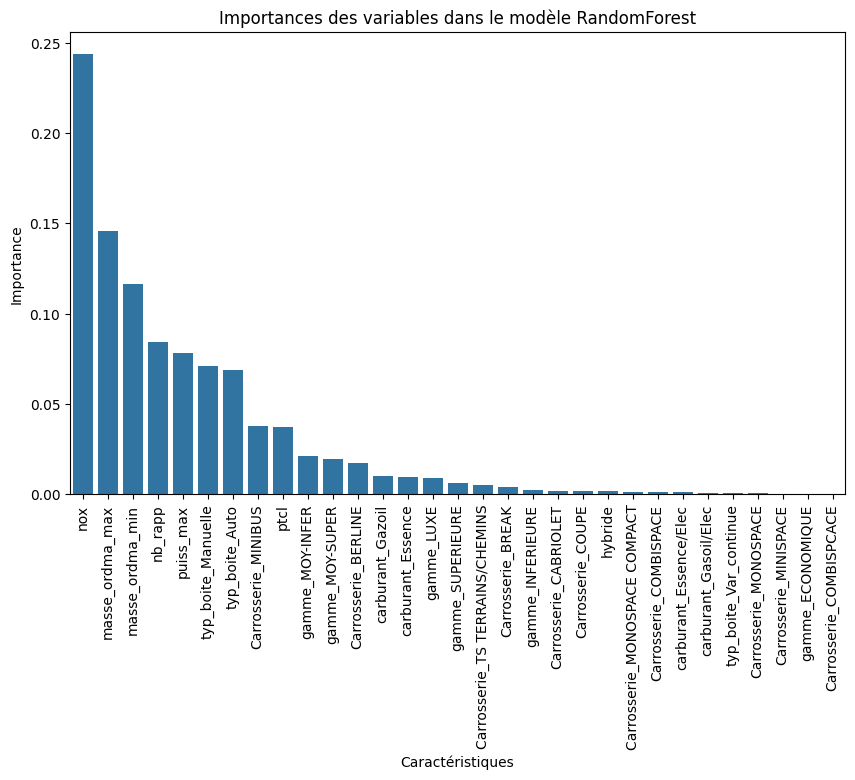

In [121]:
# On récupère le modèle 1 et on regarde les données ayant le plus d'importance

importances = model1.feature_importances_

features = X_train.columns  
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les résultats
print(importance_df)

# Affichage sous forme de graphe
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df)
plt.title('Importances des variables dans le modèle RandomForest')
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.xticks(rotation=90)  
plt.show()

                            Feature  Importance
29               typ_boite_Manuelle    0.229508
13              Carrosserie_MINIBUS    0.187519
28                   typ_boite_Auto    0.143593
27                 carburant_Gazoil    0.078302
22                  gamme_MOY-SUPER    0.047582
4                   masse_ordma_min    0.044435
6                           nb_rapp    0.039478
2                               nox    0.033631
5                   masse_ordma_max    0.032901
3                              ptcl    0.020822
26            carburant_Gasoil/Elec    0.017308
0                           hybride    0.016914
24                carburant_Essence    0.016447
1                         puiss_max    0.014217
17  Carrosserie_TS TERRAINS/CHEMINS    0.012582
20                       gamme_LUXE    0.011294
7               Carrosserie_BERLINE    0.007627
25           carburant_Essence/Elec    0.006562
19                 gamme_INFERIEURE    0.006068
15            Carrosserie_MONOSPACE    0

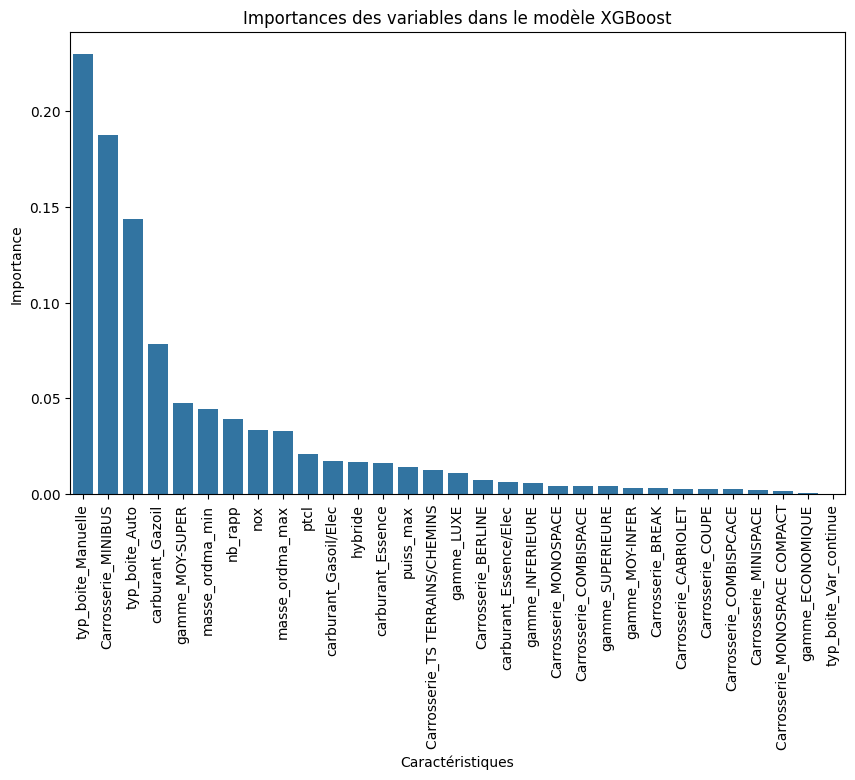

In [120]:
# On récupère le modèle 2 et on regarde les données ayant le plus d'importance

importances = model2.feature_importances_

features = X_train.columns  
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Afficher les résultats
print(importance_df)

# Affichage sous forme de graphe
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df)
plt.title('Importances des variables dans le modèle XGBoost')
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.xticks(rotation=90)  
plt.show()

In [89]:
df=pd.read_csv("Donnees_propres.csv")

X = df[['nox', 'masse_ordma_min', 'masse_ordma_max', 'nb_rapp', 'puiss_max']]

X_encoded = pd.get_dummies(X, dtype='int')


In [90]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

score données train 0.8925106342302729
score données test 0.8678073026190021
              precision    recall  f1-score   support

           0       0.77      0.65      0.70        31
           1       0.79      0.87      0.83       249
           2       0.82      0.78      0.80       427
           3       0.76      0.71      0.73       324
           4       0.79      0.87      0.83      3333
           5       0.93      0.88      0.90      5968
           6       0.99      0.93      0.96       130

    accuracy                           0.87     10462
   macro avg       0.83      0.81      0.82     10462
weighted avg       0.87      0.87      0.87     10462



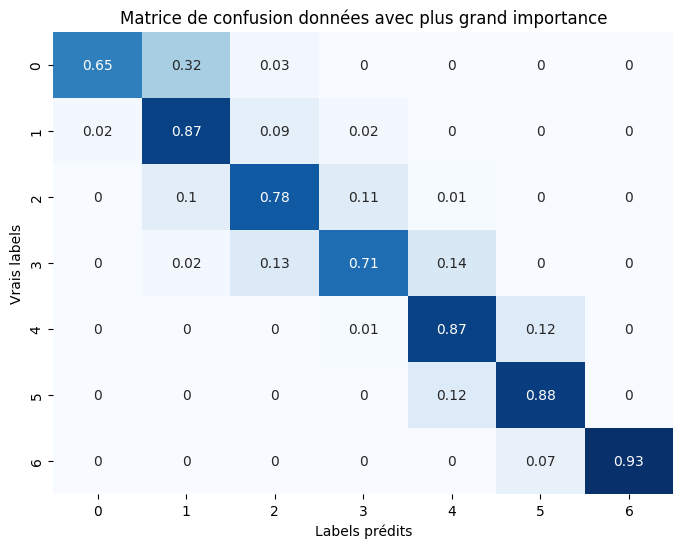

In [91]:
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion données avec plus grand importance")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Selection des données purement caracteristiques de la voiture

In [92]:
df=pd.read_csv("Donnees_propres.csv")
df_caract = df[['carburant','hybride','masse_ordma_min','masse_ordma_max',
                "puiss_max",'Carrosserie','typ_boite','nb_rapp', 'gamme']]


In [93]:
# On remplace les notes alphabétiques par les notes numériques correspondantes
df_caract['hybride'] = df_caract['hybride'].replace({'oui':1, 'non': 0})

df_encoded = pd.get_dummies(df_caract, dtype='int')

In [94]:

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

score données train 0.8337475505424652
score données test 0.8124641559931179
              precision    recall  f1-score   support

           0       0.64      0.58      0.61        31
           1       0.77      0.85      0.81       249
           2       0.84      0.76      0.80       427
           3       0.76      0.74      0.75       324
           4       0.77      0.67      0.72      3333
           5       0.83      0.90      0.86      5968
           6       1.00      0.92      0.96       130

    accuracy                           0.81     10462
   macro avg       0.80      0.77      0.79     10462
weighted avg       0.81      0.81      0.81     10462



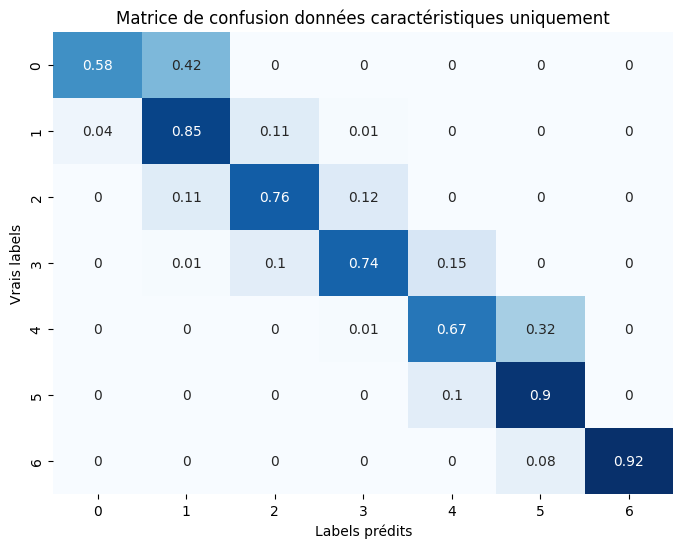

In [95]:
# Modele
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion données caractéristiques uniquement")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

On regarde quelles données caractéristiques ont le plus d'importance

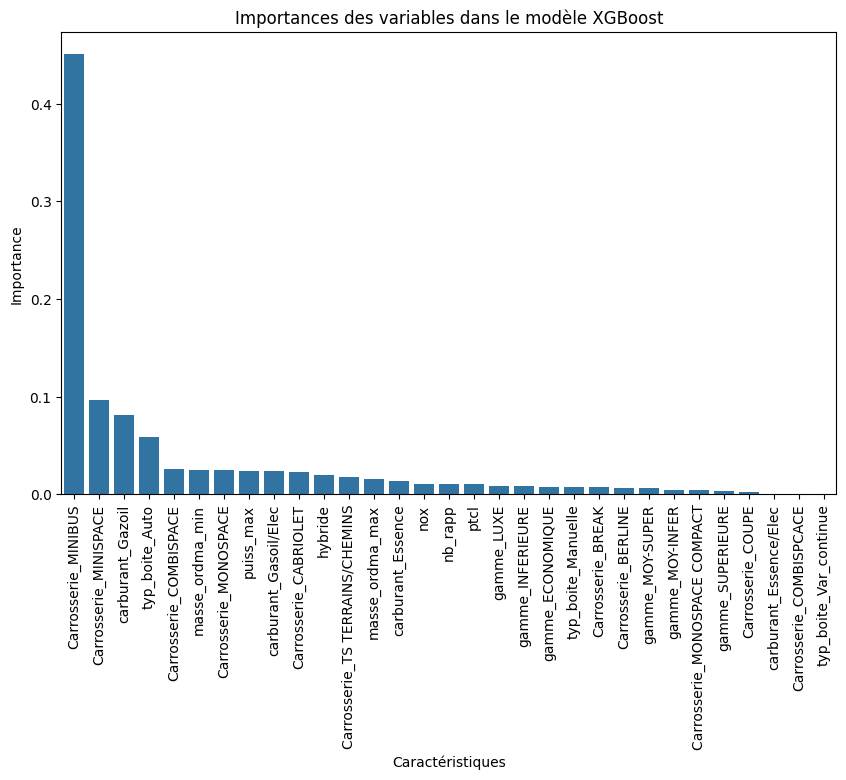

In [124]:
importances = model.feature_importances_

features = X_train.columns  
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Affichage sous forme de graphe
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df)
plt.title('Importances des variables dans le modèle XGBoost')
plt.xlabel('Caractéristiques')
plt.ylabel('Importance')
plt.xticks(rotation=90)  
plt.show()

Avec les 5 caractéristiques les plus importantes

In [126]:
df_caract = df[['Carrosserie','carburant', 'typ_boite', 'masse_ordma_max', 'puiss_max']]

df_encoded = pd.get_dummies(df_caract, dtype='int')

X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

score données train 0.8223247144290972
score données test 0.8007073217358057
              precision    recall  f1-score   support

           0       0.65      0.71      0.68        31
           1       0.80      0.82      0.81       249
           2       0.81      0.76      0.79       427
           3       0.73      0.73      0.73       324
           4       0.78      0.62      0.69      3333
           5       0.81      0.90      0.86      5968
           6       0.70      0.95      0.81       130

    accuracy                           0.80     10462
   macro avg       0.76      0.79      0.77     10462
weighted avg       0.80      0.80      0.80     10462



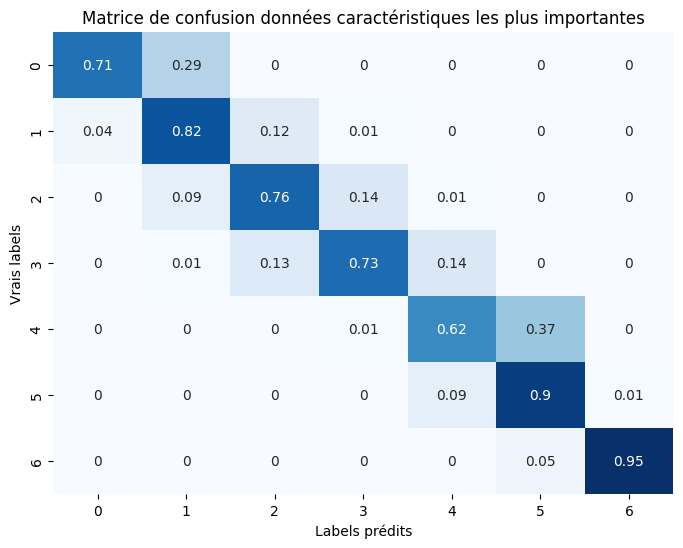

In [127]:
model = RandomForestClassifier(n_estimators=300, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction
y_pred = model.predict(X_test_scaled)

# Résultats
print('score données train', model.score(X_train_scaled, y_train))
print('score données test', model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion données caractéristiques les plus importantes")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Retour sur les données initiales

In [99]:
df_encoded = pd.get_dummies(df_clear, dtype='int')

X = df_encoded.drop(columns ='etiquette', axis = 1)
y= df_encoded['etiquette']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

GridsearchCV

{'max_depth': 70, 'n_estimators': 300}
score données train 0.8223247144290972
score données test 0.8033836742496655
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        31
           1       0.80      0.84      0.82       249
           2       0.82      0.76      0.79       427
           3       0.74      0.74      0.74       324
           4       0.78      0.64      0.70      3333
           5       0.82      0.90      0.86      5968
           6       0.70      0.95      0.81       130

    accuracy                           0.80     10462
   macro avg       0.76      0.79      0.77     10462
weighted avg       0.80      0.80      0.80     10462



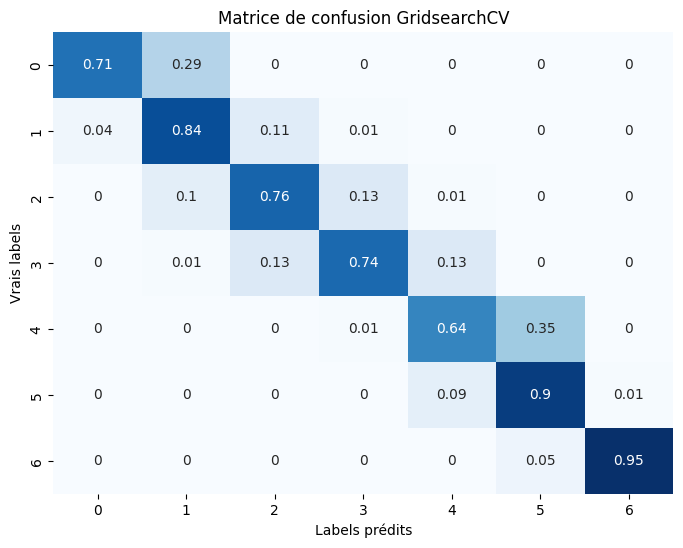

In [129]:


from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [50, 100, 300, 200, 500], 'max_depth': [50, 70, 100, 200, 300]}
model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', n_jobs= -1)

grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Résultats
print('score données train', best_model.score(X_train_scaled, y_train))
print('score données test', best_model.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion GridsearchCV")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()


# Deep learning

MLP classifier

score données train 0.6103809205180901
score données test 0.610495125215064
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.00      0.00      0.00       249
           2       0.42      0.39      0.41       427
           3       0.37      0.40      0.38       324
           4       0.54      0.78      0.64      3333
           5       0.86      0.66      0.75      5968
           6       0.16      0.28      0.20       130

    accuracy                           0.66     10462
   macro avg       0.33      0.36      0.34     10462
weighted avg       0.69      0.66      0.66     10462



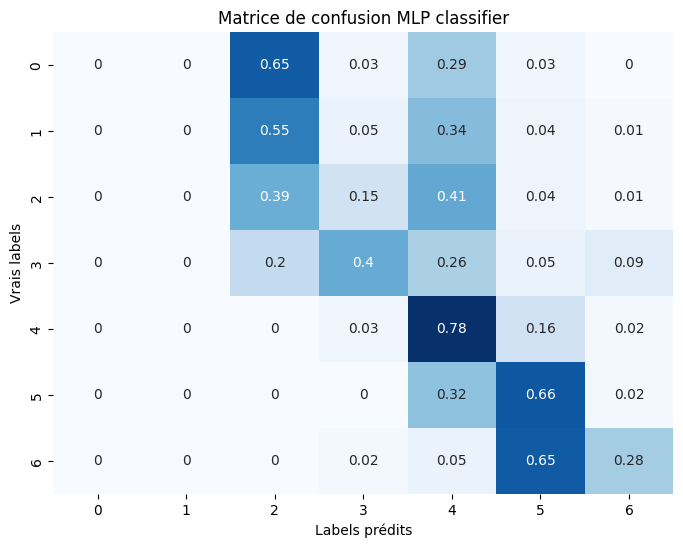

In [132]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42, alpha=0.001, solver='adam',early_stopping=True)
mlp.fit(X_train, y_train)

# Prédictions avec le modèle
y_pred = mlp.predict(X_test)

# Résultats
print('score données train', mlp.score(X_train_scaled, y_train))
print('score données test', mlp.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred))

cnf_matrix = confusion_matrix(y_test, y_pred, normalize='true').round(2)

plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion MLP classifier")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

Modèle sequentiel avec une seule couche cachée

Epoch 1/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5860 - loss: 1.2857 - val_accuracy: 0.7320 - val_loss: 0.5776
Epoch 2/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7397 - loss: 0.5626 - val_accuracy: 0.7411 - val_loss: 0.5333
Epoch 3/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7411 - loss: 0.5307 - val_accuracy: 0.7495 - val_loss: 0.5144
Epoch 4/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7511 - loss: 0.5047 - val_accuracy: 0.7499 - val_loss: 0.5012
Epoch 5/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7527 - loss: 0.4929 - val_accuracy: 0.7544 - val_loss: 0.4936
Epoch 6/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7535 - loss: 0.4888 - val_accuracy: 0.7559 - val_loss: 0.4866
Epoch 7/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7524 - loss: 0.4850 - val_accuracy: 0.7548 - val_loss: 0.4823
Epoch 8/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7581 - loss: 0.4739 - 

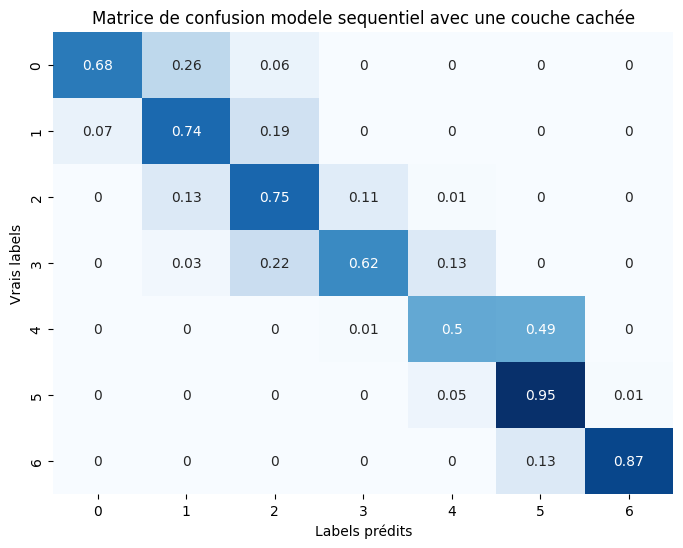

In [141]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle séquentiel
model = Sequential()

# Get the number of features from the training data
num_features = X_train_scaled.shape[1]

# Ajout des couches
model.add(Dense(units=64, activation="relu", input_shape=(num_features,)))
model.add(Dense(units=7, activation="softmax"))

# Compilation
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Ajout du callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Surveille la perte sur l'ensemble de validation
    patience=20,         # Nombre d'epochs sans amélioration avant d'arrêter
    restore_best_weights=True,  # Restaure les poids du meilleur modèle trouvé
    verbose=1
)

# Entraînement
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000,                 # Nombre maximal d'epochs
    batch_size=128,             # Taille des batchs
    validation_split=0.2,       # 20% des données utilisées pour la validation
    callbacks=[early_stopping]  # Ajout de l'early stopping
)


# Évaluation
test_pred = model.predict(X_test_scaled)
model.evaluate(X_test_scaled, y_test)

test_pred_class = test_pred.argmax(axis=1)
print(classification_report(y_test, test_pred_class))

# Resultats 

cnf_matrix = confusion_matrix(y_test, test_pred_class, normalize='true').round(2)


plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion modele sequentiel avec une couche cachée")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()


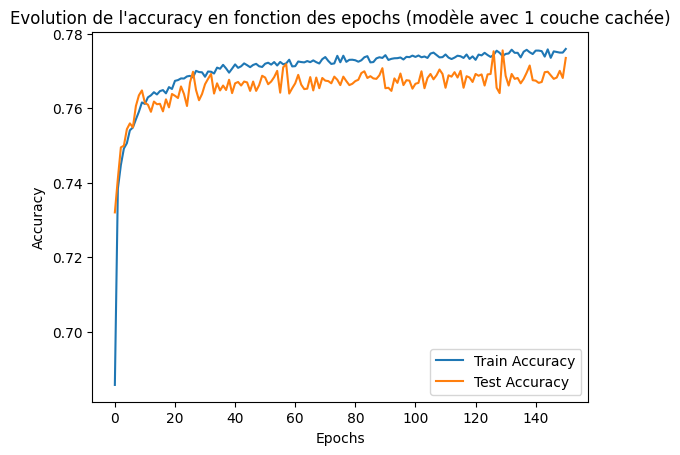

In [142]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Evolution de l'accuracy en fonction des epochs (modèle avec 1 couche cachée)")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Modèle sequentiel avec plusieurs couches et la fonction d'activation Relu

Epoch 1/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6930 - loss: 0.9117 - val_accuracy: 0.7546 - val_loss: 0.4944
Epoch 2/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7531 - loss: 0.4857 - val_accuracy: 0.7528 - val_loss: 0.4852
Epoch 3/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7643 - loss: 0.4718 - val_accuracy: 0.7602 - val_loss: 0.4701
Epoch 4/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7604 - loss: 0.4673 - val_accuracy: 0.7645 - val_loss: 0.4570
Epoch 5/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7678 - loss: 0.4531 - val_accuracy: 0.7605 - val_loss: 0.4635
Epoch 6/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7692 - loss: 0.4533 - val_accuracy: 0.7637 - val_loss: 0.4547
Epoch 7/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7662 - loss: 0.4515 - val_accuracy: 0.7633 - val_loss: 0.4518
Epoch 8/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7677 - loss: 0.4464 - 

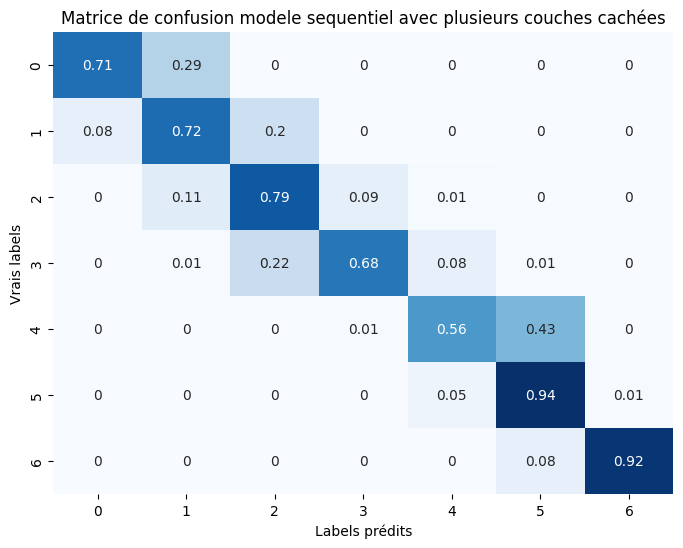

In [ ]:


# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle séquentiel
model = Sequential()

# Get the number of features from the training data
num_features = X_train_scaled.shape[1]

# Ajout des couches
model.add(Dense(units=256, activation="relu", input_shape=(num_features,)))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=64, activation="relu"))
model.add(Dense(units=32, activation="relu"))

model.add(Dense(units=10, activation="softmax"))  # Couche de sortie

# Compilation
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Ajout du callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Surveille la perte sur l'ensemble de validation
    patience=20,         # Nombre d'epochs sans amélioration avant d'arrêter
    restore_best_weights=True,  # Restaure les poids du meilleur modèle trouvé
    verbose=1
)

# Entraînement
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000,                 # Nombre maximal d'epochs
    batch_size=128,             # Taille des batchs
    validation_split=0.2,       # 20% des données utilisées pour la validation
    callbacks=[early_stopping]  # Ajout de l'early stopping
)


# Évaluation
test_pred = model.predict(X_test_scaled)
model.evaluate(X_test_scaled, y_test)

test_pred_class = test_pred.argmax(axis=1)
print(classification_report(y_test, test_pred_class))

# Calculer la matrice de confusion

cnf_matrix = confusion_matrix(y_test, test_pred_class, normalize='true').round(2)


plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion modele sequentiel avec plusieurs couches cachées")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

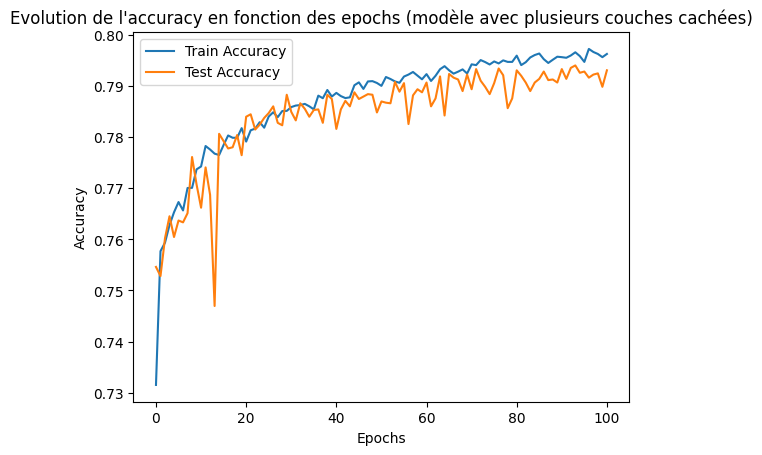

In [144]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Evolution de l'accuracy en fonction des epochs (modèle avec plusieurs couches cachées)")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Modèle sequentiel avec plusieurs couches et la fonction d'acitvation Leakyrelu

Epoch 1/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6859 - loss: 0.9317 - val_accuracy: 0.7544 - val_loss: 0.4936
Epoch 2/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7523 - loss: 0.4898 - val_accuracy: 0.7575 - val_loss: 0.4864
Epoch 3/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7552 - loss: 0.4751 - val_accuracy: 0.7601 - val_loss: 0.4933
Epoch 4/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7596 - loss: 0.4686 - val_accuracy: 0.7639 - val_loss: 0.4649
Epoch 5/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7699 - loss: 0.4554 - val_accuracy: 0.7643 - val_loss: 0.4614
Epoch 6/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7628 - loss: 0.4577 - val_accuracy: 0.7607 - val_loss: 0.4549
Epoch 7/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7648 - loss: 0.4568 - val_accuracy: 0.7615 - val_loss: 0.4551
Epoch 8/1000
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7636 - loss: 0.4482 - 

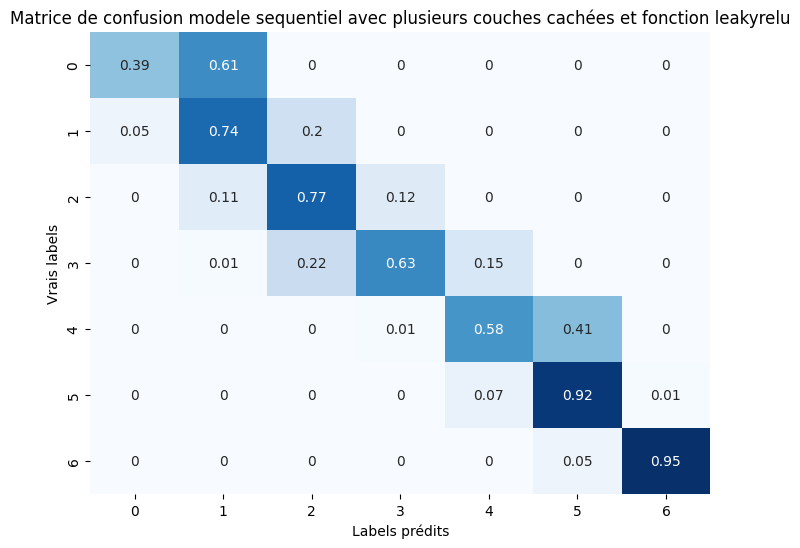

In [146]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LeakyReLU
import numpy as np

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Création du modèle séquentiel
model = Sequential()

# Get the number of features from the training data
num_features = X_train_scaled.shape[1]

# Ajout des couches

model = Sequential()
model.add(Dense(256, input_shape=(num_features,)))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.01))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.01))


model.add(Dense(units=10, activation="softmax"))  # Couche de sortie



# Compilation
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Ajout du callback EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Surveille la perte sur l'ensemble de validation
    patience=20,         # Nombre d'epochs sans amélioration avant d'arrêter
    restore_best_weights=True,  # Restaure les poids du meilleur modèle trouvé
    verbose=1
)

# Entraînement
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000,                 # Nombre maximal d'epochs
    batch_size=128,             # Taille des batchs
    validation_split=0.2,       # 20% des données utilisées pour la validation
    callbacks=[early_stopping]  # Ajout de l'early stopping
)

# Évaluation
test_pred = model.predict(X_test_scaled)
model.evaluate(X_test_scaled, y_test)

test_pred_class = test_pred.argmax(axis=1)
print(classification_report(y_test, test_pred_class))

# Calculer la matrice de confusion

cnf_matrix = confusion_matrix(y_test, test_pred_class, normalize='true').round(2)


plt.figure(figsize=(8, 6))
plt.title("Matrice de confusion modele sequentiel avec plusieurs couches cachées et fonction leakyrelu")
sns.heatmap(cnf_matrix, cmap='Blues', annot=True, cbar=False)
plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()

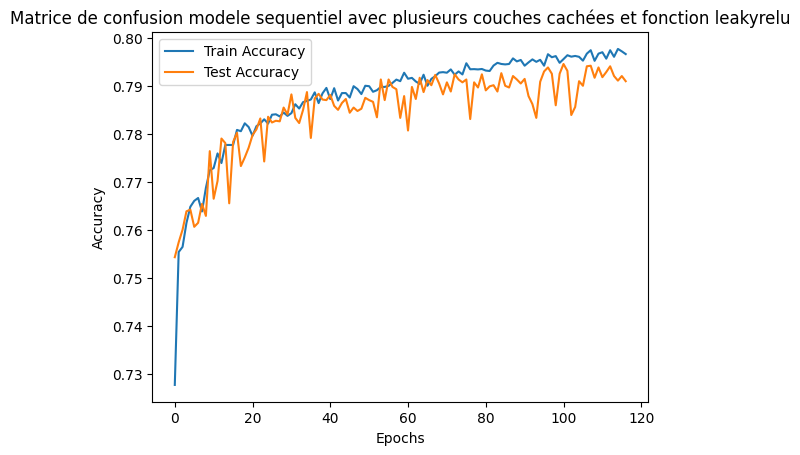

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Evolution de l'accuracy en fonction des epochs (modèle avec plusieurs couches cachées et fonction leakyrelu")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Création du modèle séquentiel
model = Sequential()

# Get the number of features from the training data
num_features = X_train_scaled.shape[1]

# Ajout des couches avec Batch Normalization et Dropout
model.add(Dense(256, activation="relu", input_shape=(num_features,)))
model.add(BatchNormalization())  
model.add(Dropout(0.3))  # Dropout pour éviter l'overfitting

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation="relu"))
model.add(BatchNormalization())

# Couche de sortie
model.add(Dense(10, activation="softmax"))

# Compilation du modèle avec Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Callbacks pour optimiser l'entraînement
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=20,         
    restore_best_weights=True,  
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5, 
    patience=10, 
    verbose=1
)

# Entraînement
history = model.fit(
    X_train_scaled, y_train,
    epochs=1000,  
    batch_size=64,  # Taille de batch réduite pour une meilleure généralisation
    validation_split=0.2,  
    callbacks=[early_stopping, reduce_lr]
)

# Évaluation du modèle
test_pred = model.predict(X_test_scaled)
model.evaluate(X_test_scaled, y_test)

test_pred_class = test_pred.argmax(axis=1)
print(classification_report(y_test, test_pred_class))


Epoch 1/1000
524/524 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6008 - loss: 1.2752 - val_accuracy: 0.7671 - val_loss: 0.4799 - learning_rate: 0.0010
Epoch 2/1000
524/524 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7432 - loss: 0.5285 - val_accuracy: 0.7749 - val_loss: 0.4430 - learning_rate: 0.0010
Epoch 3/1000
524/524 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7475 - loss: 0.4940 - val_accuracy: 0.7719 - val_loss: 0.4415 - learning_rate: 0.0010
Epoch 4/1000
524/524 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7582 - loss: 0.4691 - val_accuracy: 0.7810 - val_loss: 0.4297 - learning_rate: 0.0010
Epoch 5/1000
524/524 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7639 - loss: 0.4591 - val_accuracy: 0.7843 - val_loss: 0.4165 - learning_rate: 0.0010
Epoch 6/1000
524/524 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7744 - loss: 0.4428 - val_accuracy: 0.7878 - val_loss: 0.4177 - learning_rate: 0.0010
Epoch 7/1000
524/524 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.777

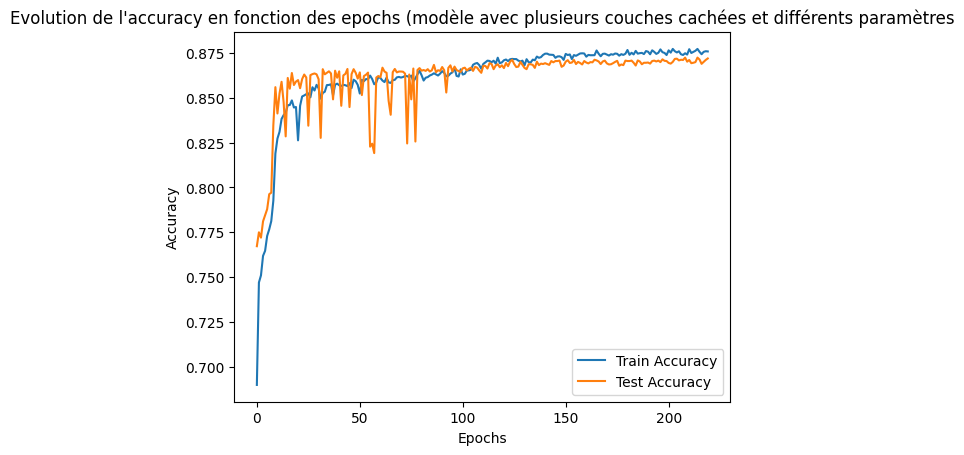

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title("Evolution de l'accuracy en fonction des epochs (modèle avec plusieurs couches cachées et différents paramètres")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()